# Importing Libraries & Dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import sklearn as sklearn
import matplotlib.pyplot as plot 
from jupyterthemes import jtplot 
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


In [2]:
tweets_df = pd.read_csv('twitter.csv')

In [3]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

=> The "id" column isn't adding much when it comes to training and testing the model, so we will drop it

In [7]:
#Creating s data subset
tweets_df_susbet = tweets_df[["id","label","tweet"]]

In [8]:
tweets_df_susbet = tweets_df_susbet.drop(['id'], axis=1)
tweets_df_susbet

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# Data Exploration

<Axes: >

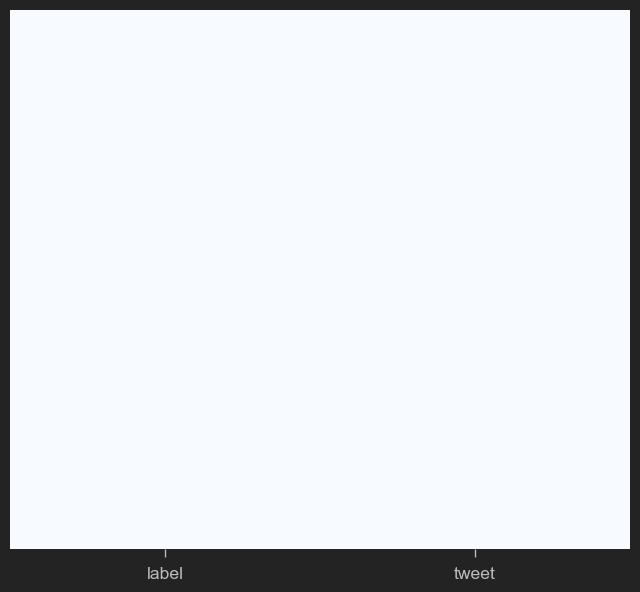

In [9]:
#find out of the dataframe has missing data
sns.heatmap(tweets_df_susbet.isnull(), yticklabels=False, cbar=False, cmap="Blues")

=> The empty histogram shows that we don't have any null or missing elements in our dataframe

array([[<Axes: title={'center': 'label'}>]], dtype=object)

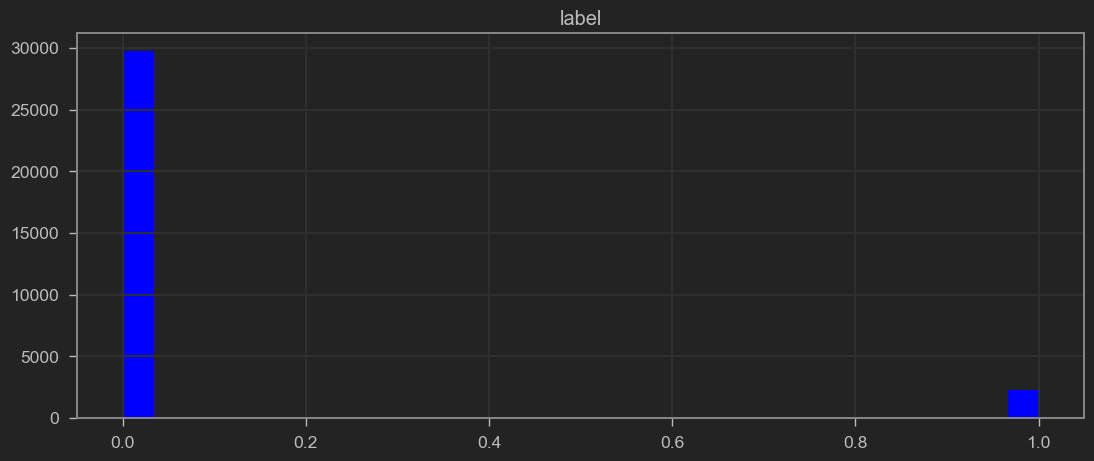

In [10]:
tweets_df_susbet.hist(bins=30, figsize=(13,5), color="Blue")
#we can do the same thing using countplot from seaborn
#sns.countplot(tweets_df_susbet['label'], label='count')

This histogram shows that we have two classes '0' and '1'.
It shows that I have about 30000 samples/tweets of class '1' and about 2300 samples/tweets of class '0'


=> This means that my dataset is unbalanced

In [11]:
#Looking for the length of the tweets in the dataframe
tweets_df_susbet['length']=tweets_df_susbet['tweet'].apply(len)
tweets_df_susbet

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [12]:
tweets_df_susbet.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [13]:
#viewing the shortest tweet (legnth = 11)
tweets_df_susbet[ tweets_df_susbet['length'] == 11 ]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [14]:
#viewing the shortest tweet (legnth = 274)
tweets_df_susbet[ tweets_df_susbet['length'] == 274 ]['tweet']

19770     @user lmfao pathetic #soit   #growup #funny #...
Name: tweet, dtype: object

In [15]:
#viewing the tweet with mean length (legnth = 84)
tweets_df_susbet[ tweets_df_susbet['length'] == 84 ]['tweet']

43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

In [16]:
#view the first row
tweets_df_susbet[ tweets_df_susbet['length'] == 84 ]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [17]:
count = (tweets_df_susbet['length'] == 84 ).sum()
print("The number of rows where tweet length is 84 = ",count)

The number of rows where tweet length is 84 =  333


<Axes: ylabel='Frequency'>

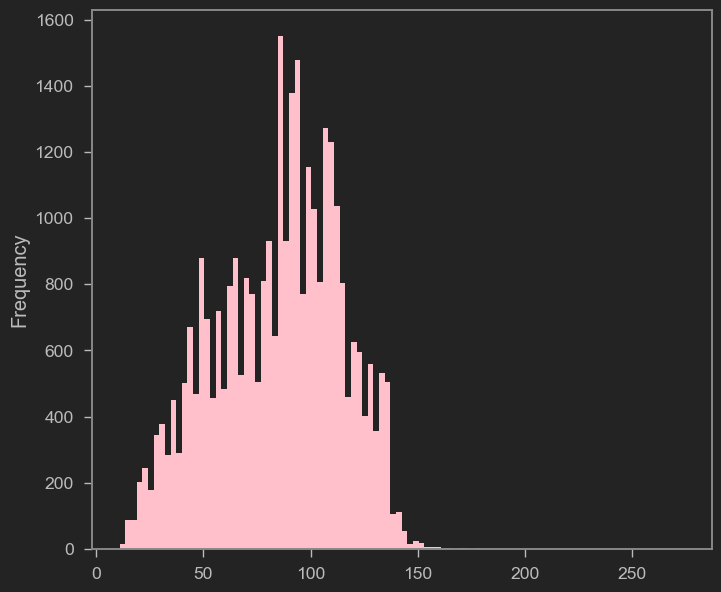

In [18]:
#plot the histogram of the length column
tweets_df_susbet['length'].plot(bins=100, kind="hist", color="Pink")

# Plotting the Wordcloud

First of all, we are going to create two new dataframes, one containing negative tweets and the other one containing positive ones

In [19]:
#Dataframe containing positive tweets (the tweets whose label is equal to 0)
positive_tweets = tweets_df_susbet[tweets_df_susbet['label']==0]
positive_tweets

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [20]:
#Dataframe containing negative tweets (the tweets whose label is equal to 1)
negative_tweets = tweets_df_susbet[tweets_df_susbet['label'] == 1]
negative_tweets

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


Now, we want to make sure that all the negative and positive tweets are grouped together in one string when we call the wordcloud function 

In [21]:
#converting the tweet column into a list
sentences = tweets_df_susbet['tweet'].tolist()
#printing the length of the list of tweets we have just created
len(sentences)

31962

In [58]:
#sentences

In [57]:
#joining the sentences we got in the list of tweets we created
sentences_in_one_string =" ".join(sentences)
#sentences_in_one_string

In [24]:
#importing wordcloud library
from wordcloud import WordCloud

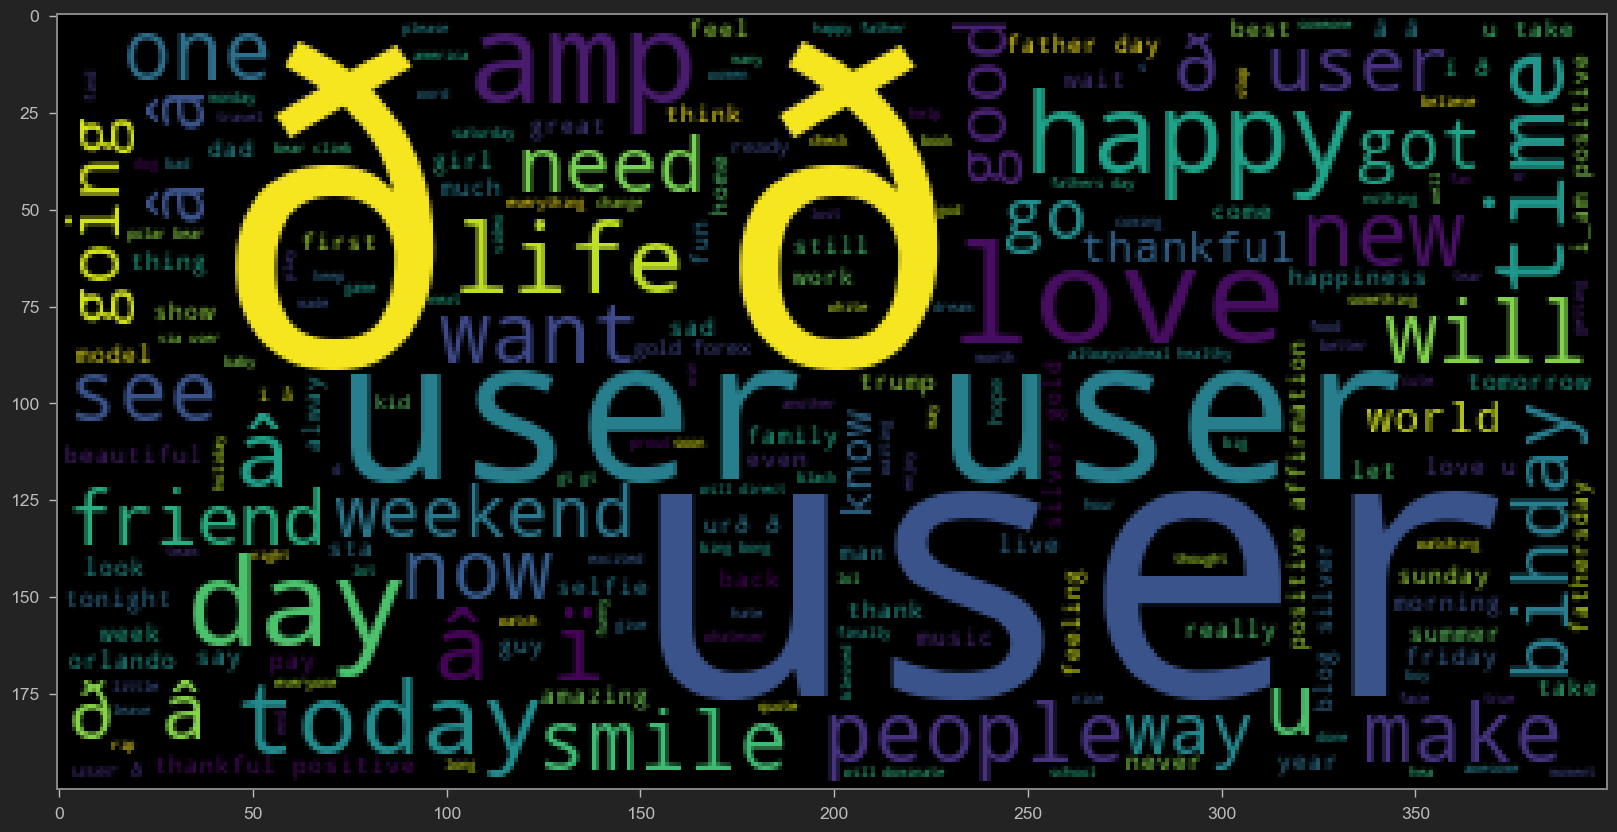

In [25]:
#plotting the wordcloud figure
plot.figure(figsize=(20,50))
plot.imshow(WordCloud().generate(sentences_in_one_string)) #imshow is image show

=> This visualization shows that the most used word in tweets is "user". It also show that "life", "love" and "time" are amongts the hot topics on twitter. It also shows that the word "happy" is also very commonly used which might reflect that twitter users are sharing positive content.

### Plotting Negative Tweets Only

In [26]:
#Grouping positive tweets in one list
positive_sentences = positive_tweets['tweet'].tolist()
len(positive_sentences)

29720

In [56]:
#Joining the tweets of the list in one massive string
positive_sentences_in_one =" ".join(positive_sentences)
#positive_sentences_in_one

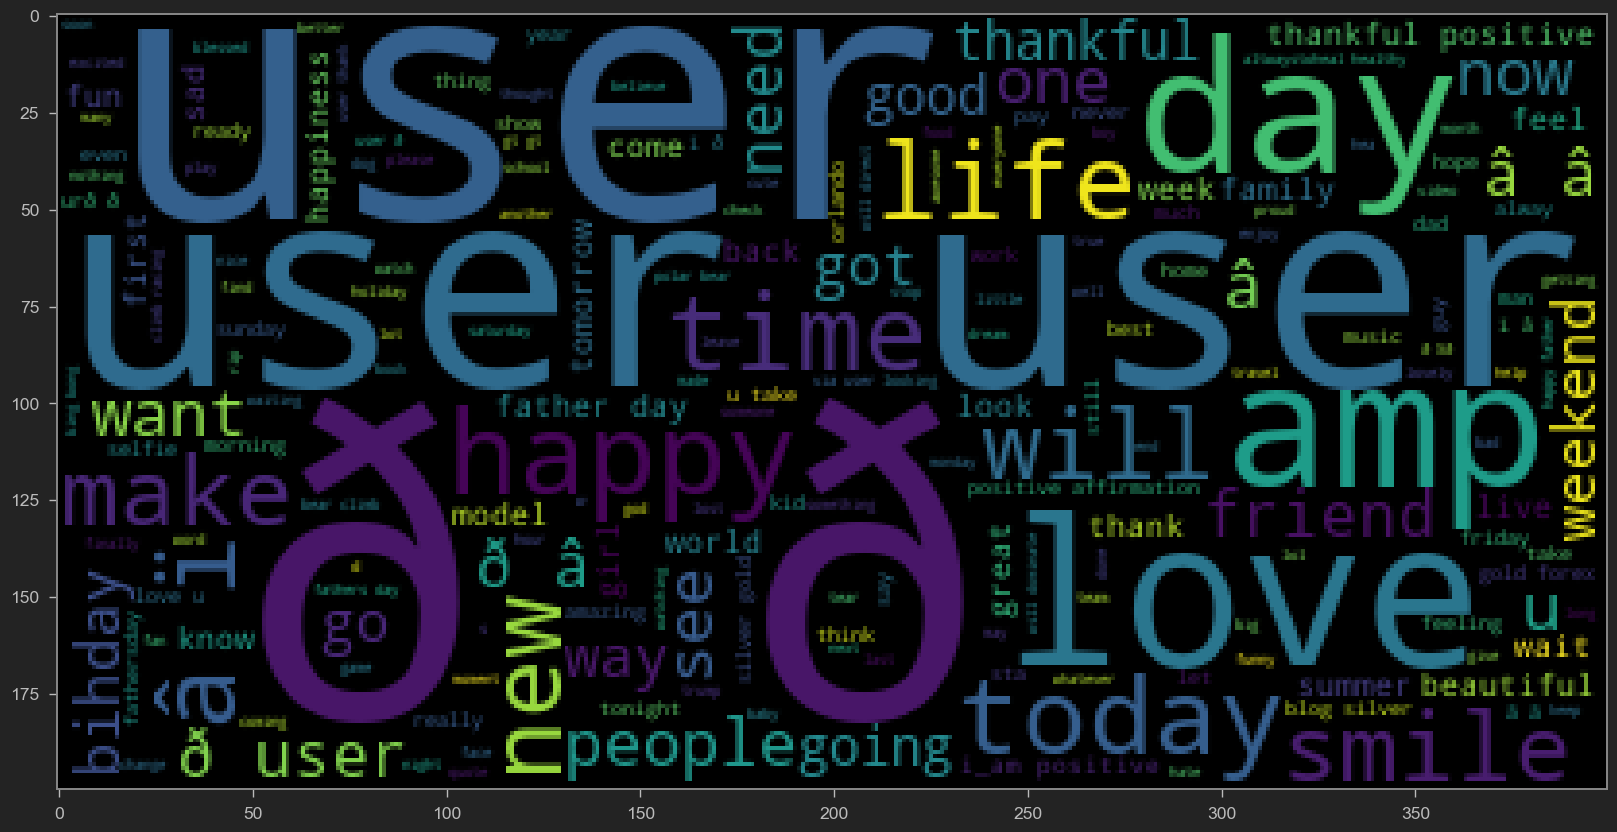

In [28]:
#Plotting the WordCloud figure
plot.figure(figsize=(20,50))
plot.imshow(WordCloud().generate(positive_sentences_in_one))

=> The positive tweets WordCloud figure shows that "life", "weekend", "love", "time" and "people" are the topics that bring the most positivity to tweets

### Plotting Positive Tweets Only

In [29]:
#Grouping all negative tweets in one list
negative_sentences = negative_tweets['tweet'].tolist()
len(negative_sentences)

2242

In [55]:
#Joining the elements of the list we created in one sentence
negative_sentences_in_one =" ".join(negative_sentences)
#negative_sentences_in_one

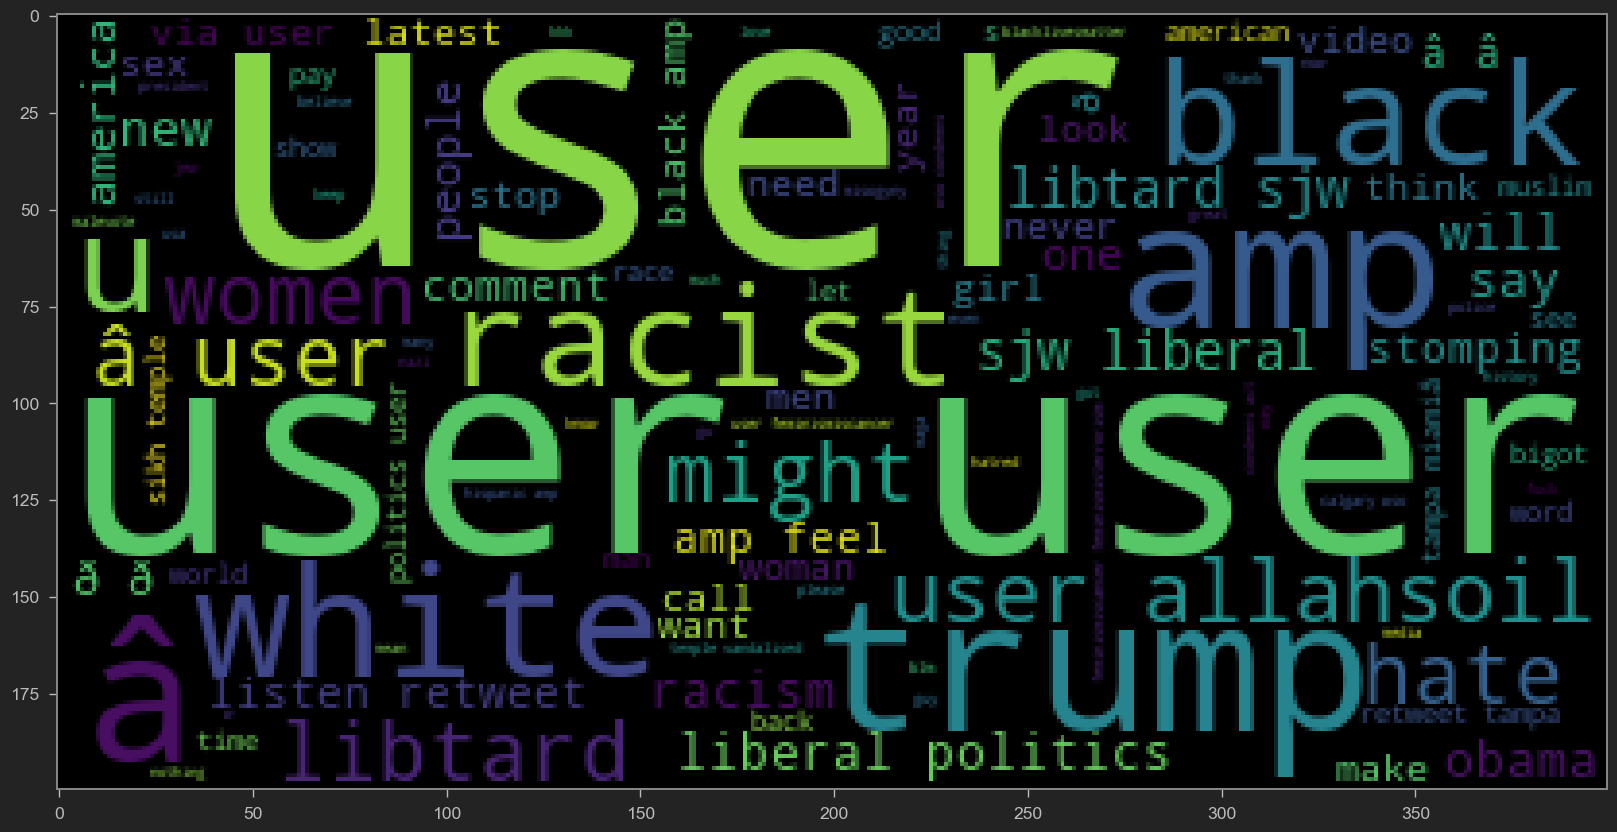

In [31]:
#Plotting the WordCloud figure
plot.figure(figsize=(20,50))
plot.imshow(WordCloud().generate(negative_sentences_in_one))

=> The negative tweets WordCloud figure shows that "trump", "racist", "hate" and "women" are topics that bring the most negativity to tweets

# Data Preprocessing

Here, we will be removing **punctuation** and **stopwords** (ex: he, she, and...) from our tweets to prepare our data for the next steps (visualization, training, etc..), as they don't add a lot of value when we will be training our models

#### Removing Punctuation

In [67]:
#Importing string library
import string as st
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
#Example using string/list comprehesion
Test1 = "$My name is; not! that?^"
Test1_punc_removed = [ char  for char in Test1 if char not in st.punctuation  ]
Test1_punc_removed_join = ''.join(Test1_punc_removed)
Test1_punc_removed_join

'My name is not that'

In [34]:
#Applying the same thing on our positive sentences
#positive_sentences_in_one = [char for char in positive_sentences_in_one if char not in st.punctuation ]
#positive_sentences_in_one_join = ''.join(positive_sentences_in_one)
#positive_sentences_in_one_join

In [35]:
#Applying the same thing on our negative sentences
#negative_sentences_in_one = [char for char in negative_sentences_in_one if char not in st.punctuation ]
#negative_sentences_in_one_join = ''.join(negative_sentences_in_one)
#negative_sentences_in_one_join

#### Removing Stopwords

In [36]:
#Importing Natural Language tool kit
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
 #Downloading english stopwords package 
 from nltk.corpus import stopwords
 stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
#Example
test_stopwords_removed_joined = 'I am an AI Engineer, I enjoy analysis and problem solving.'
test_stopwords_removed_joined_cleaning = [ word for word in test_stopwords_removed_joined.split() if word.lower() not in stopwords.words('english')  ]

In [39]:
test_stopwords_removed_joined_cleaning

['AI', 'Engineer,', 'enjoy', 'analysis', 'problem', 'solving.']

=> In this output we notive that the code we used to removed stopwords returned a list of words instead of a full sentence like the one we provided it with in the first place. This is due to the fact that we split the initial sentence to break it down a little more for analysis.

In [40]:
#Practice exercice
mini_challenge='Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [70]:
mini_challenge_punctuation_removed = [ char for char in mini_challenge if char not in st.punctuation ]
mini_challenge_punctuation_removed_joined = ''.join(mini_challenge_punctuation_removed)
mini_challenge_stopwords_removed_cleaning = [ word for word in mini_challenge.split() if word.lower() not in stopwords.words('english') ]
mini_challenge_stopwords_removed_cleaning

['mini', 'challenge,', 'teach', 'remove', 'stopwords', 'punctuations!']

In [42]:
#Applying the same thing on our positive sentences
#positive_sentences_in_one_join_punctuation_removed = [ char for char in positive_sentences_in_one_join if char not in st.punctuation ]
#positive_sentences_in_one_join_punctuation_removed_join = ''.join(positive_sentences_in_one_join_punctuation_removed)
#positive_sentences_in_one_join_punctuation_stopwords_removed = [ word for word in positive_sentences_in_one_join_punctuation_removed_join.split() if word.lower() not in stopwords.words('english')]
#positive_sentences_in_one_join_punctuation_stopwords_removed

In [43]:
#positive_sentences_preprocessed = ' '.join(positive_sentences_in_one_join_punctuation_stopwords_removed)
#positive_sentences_preprocessed

In [44]:
#Applying the same thing on our negative sentences
#negative_sentences_in_one_join_punctuation_removed = [ char for char in negative_sentences_in_one_join if char not in st.punctuation ]
#negative_sentences_in_one_join_punctuation_removed_join = ''.join(negative_sentences_in_one_join_punctuation_removed)
#negative_sentences_in_one_join_punctuation_stopwords_removed = [ word for word in negative_sentences_in_one_join_punctuation_removed_join.split() if word.lower() not in stopwords.words('english')]
#negative_sentences_in_one_join_punctuation_stopwords_removed

In [45]:
#negative_sentences_preprocessed = ' '.join(negative_sentences_in_one_join_punctuation_stopwords_removed)
#negative_sentences_preprocessed

#### Feature Extraction: Tokenization (Count Vectorization)

Converting text data into vectors that will be used to train our AI model(s) later on

In [46]:
#Import library
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
#Example
sample_test = ['Hello world', 'Hello Hello World', 'Hello World world world']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_test)
print(vectorizer.get_feature_names_out())

['hello' 'world']


In [48]:
print(X.toarray())

[[1 1]
 [2 1]
 [1 3]]


### Creating a pipeline to remove punctuation, stopwords and perform count vectorization

In [71]:
import string as st
#Function to remove punctuation & stopwords
def message_cleaning(message):
    remove_punctuation = [ char for char in message if char not in st.punctuation ]
    remove_punctuation_join = ''.join(remove_punctuation)
    remove_punctuation_join_cleaned = [ word for word in message.split() if word.lower() not in stopwords.words('english') ]
    return remove_punctuation_join_cleaned

In [72]:
#Testing the function on our data (tweets)
tweets_df_clean = tweets_df_susbet['tweet'].apply(message_cleaning)

In [73]:
#Viewing cleaned up vs original raw data
print('Original data: ',tweets_df_susbet['tweet'][5])
print('Cleaned data: ',tweets_df_clean[5])

Original data:  [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
Cleaned data:  ['[2/2]', 'huge', 'fan', 'fare', 'big', 'talking', 'leave.', 'chaos', 'pay', 'disputes', 'get', 'there.', '#allshowandnogo']


In [74]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning, dtype=np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df_susbet['tweet'])

In [75]:
print(vectorizer.get_feature_names_out())

['!' '!!' '!!!' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [76]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
tweets_countvectorizer.shape

(31962, 67067)

In [78]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [82]:
#Putting the array formatted data into X
X

,0,1,2,3,4,5,6,7,8,9,...,67057,67058,67059,67060,67061,67062,67063,67064,67065,67066
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


=> X is then the tokenized version of our data that we will use to train our AI 
model later on

In [86]:
y = tweets_df_susbet['label']